In [1]:
# For Data Handling and Analysis
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
from bokeh.plotting import figure, show, output_notebook
import altair as alt
import folium
from wordcloud import WordCloud
import missingno as msno
import networkx as nx

# Configure plotly and bokeh for Jupyter
cf.go_offline()  # Enable offline mode for Plotly
output_notebook()  # Enable Bokeh plots in the notebook

# Optional for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Optional confirmation message
print("All necessary modules and packages have been imported successfully!")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

Loading BokehJS ...

All necessary modules and packages have been imported successfully!


In [3]:
# Load the dataset
file_path = 'D:\student_scores_by_kaggle.csv'  # Adjust the file path if needed
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73             81   
1                       47              Doctor          90             86   
2                       13  Government Officer          81             97   
3                        3              Artist          71             74   
4                       10             Unknown          84             77   

   physics_score  chemistry_score  biology_score  english_score  \
0             93               97             63             80   
1             96              100             90             88   
2             95               96             65             77   
3             88               80             89             63   
4             65               65             80             74   

   geography_score  
0               87  
1               90  
2               94  
3               86  
4               76

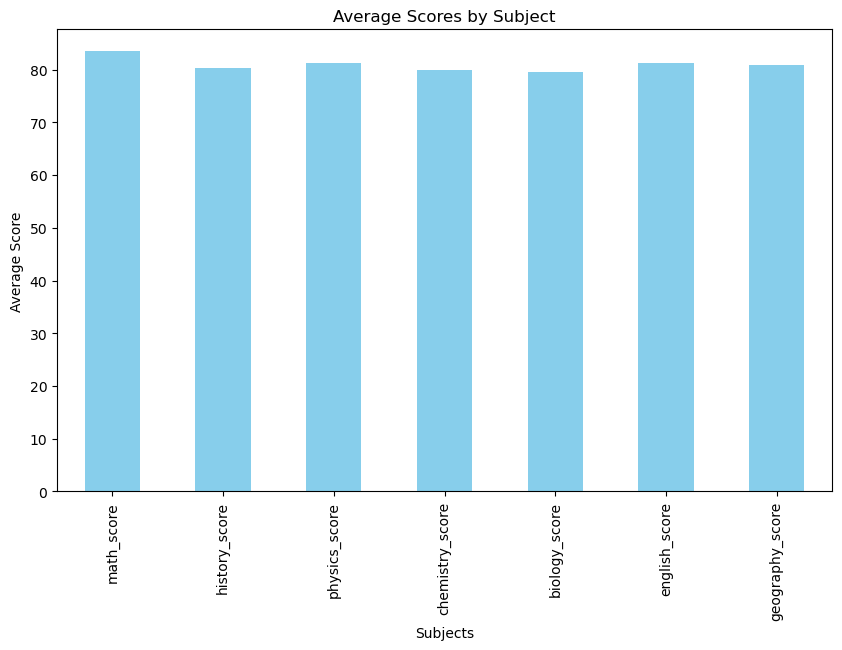

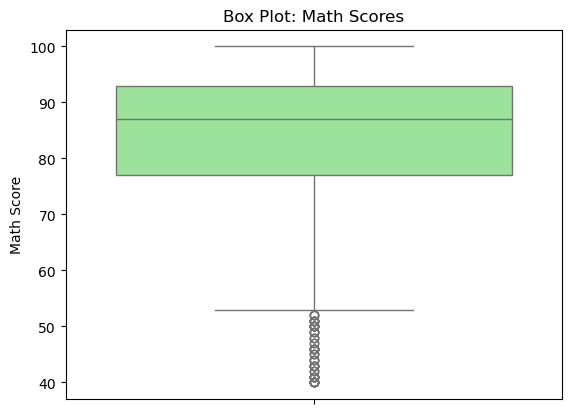

In [4]:
# Calculate average scores
average_scores = data[['math_score', 'history_score', 'physics_score', 'chemistry_score', 
                       'biology_score', 'english_score', 'geography_score']].mean()

# Bar chart
average_scores.plot(kind='bar', figsize=(10, 6), color='skyblue', title='Average Scores by Subject')
plt.ylabel('Average Score')
plt.xlabel('Subjects')
plt.show()
# Box plot for Math scores
sns.boxplot(y=data['math_score'], color='lightgreen')
plt.title('Box Plot: Math Scores')
plt.ylabel('Math Score')
plt.show()



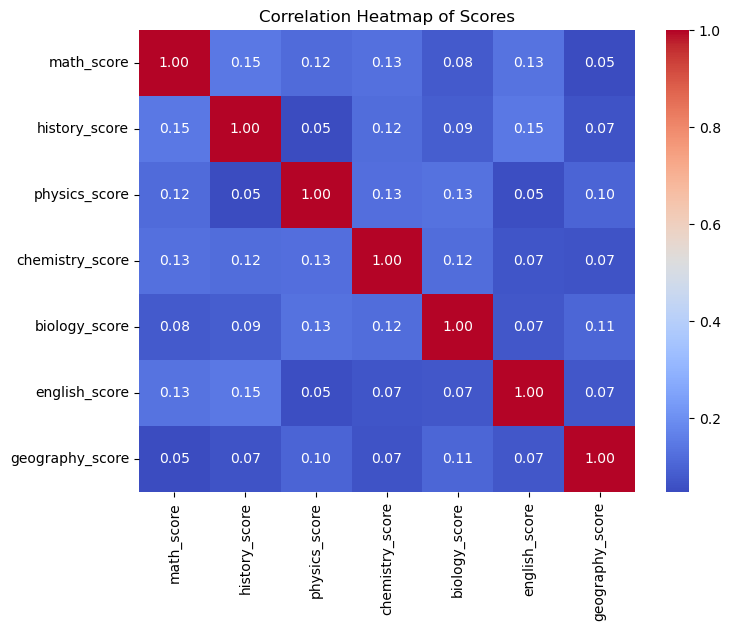

In [5]:
# Correlation heatmap
correlation_matrix = data[['math_score', 'history_score', 'physics_score', 'chemistry_score', 
                           'biology_score', 'english_score', 'geography_score']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Scores')
plt.show()


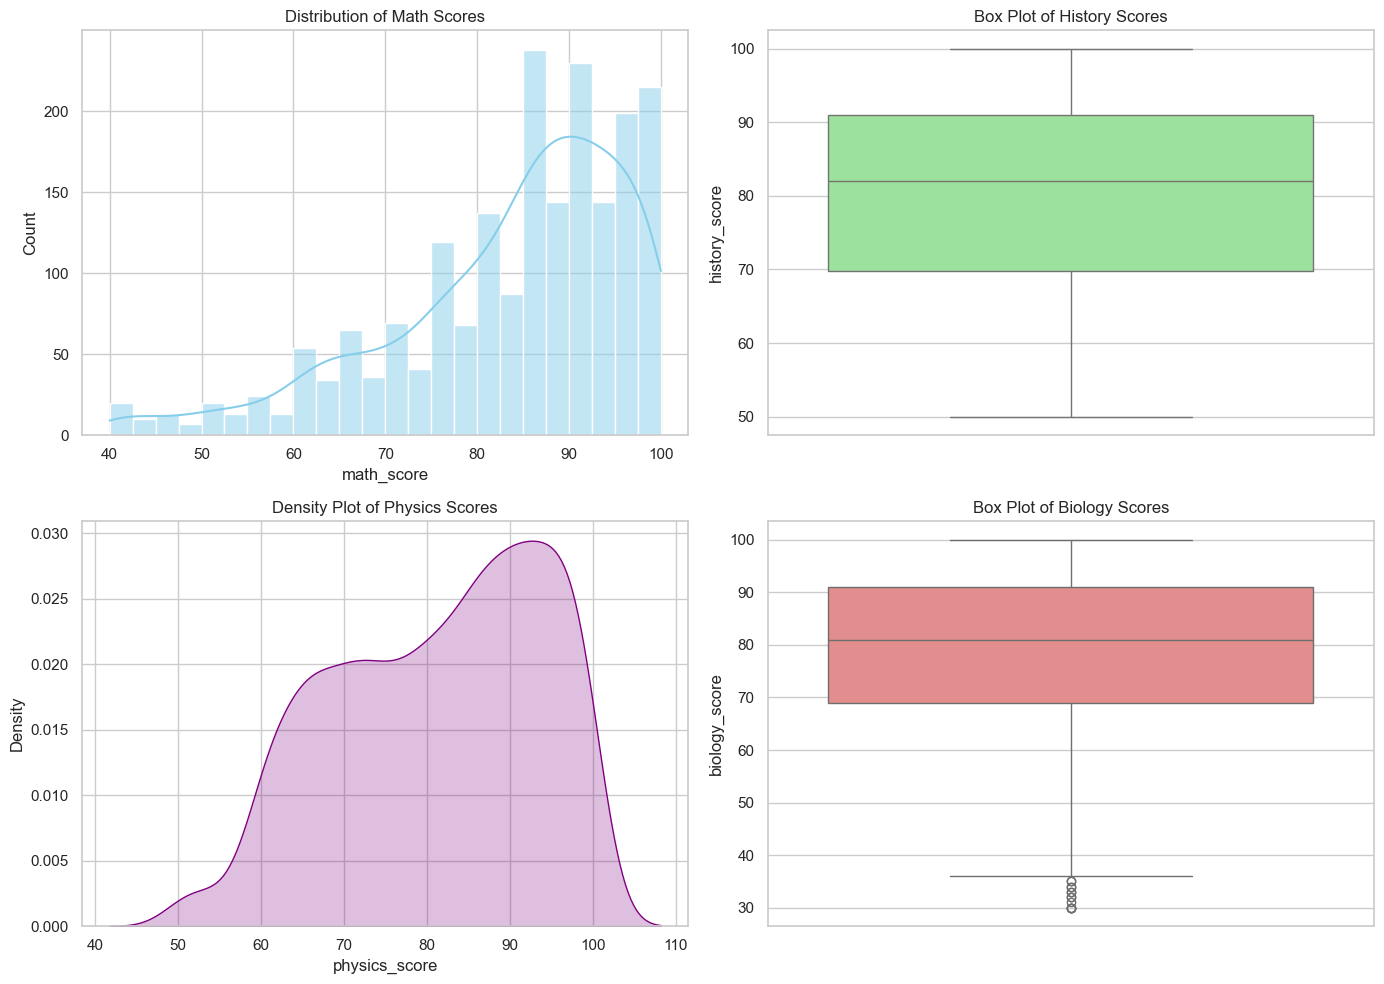

In [6]:
sns.set(style="whitegrid")

# List of subjects to analyze
subjects = ['math_score', 'history_score', 'physics_score', 'chemistry_score', 
            'biology_score', 'english_score', 'geography_score']

# Create a 2x2 grid for plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram for Math Scores
sns.histplot(data['math_score'], kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Math Scores')

# Box Plot for History Scores
sns.boxplot(data['history_score'], color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of History Scores')

# Density Plot for Physics Scores
sns.kdeplot(data['physics_score'], color='purple', shade=True, ax=axes[1, 0])
axes[1, 0].set_title('Density Plot of Physics Scores')

# Box Plot for Biology Scores
sns.boxplot(data['biology_score'], color='lightcoral', ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Biology Scores')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

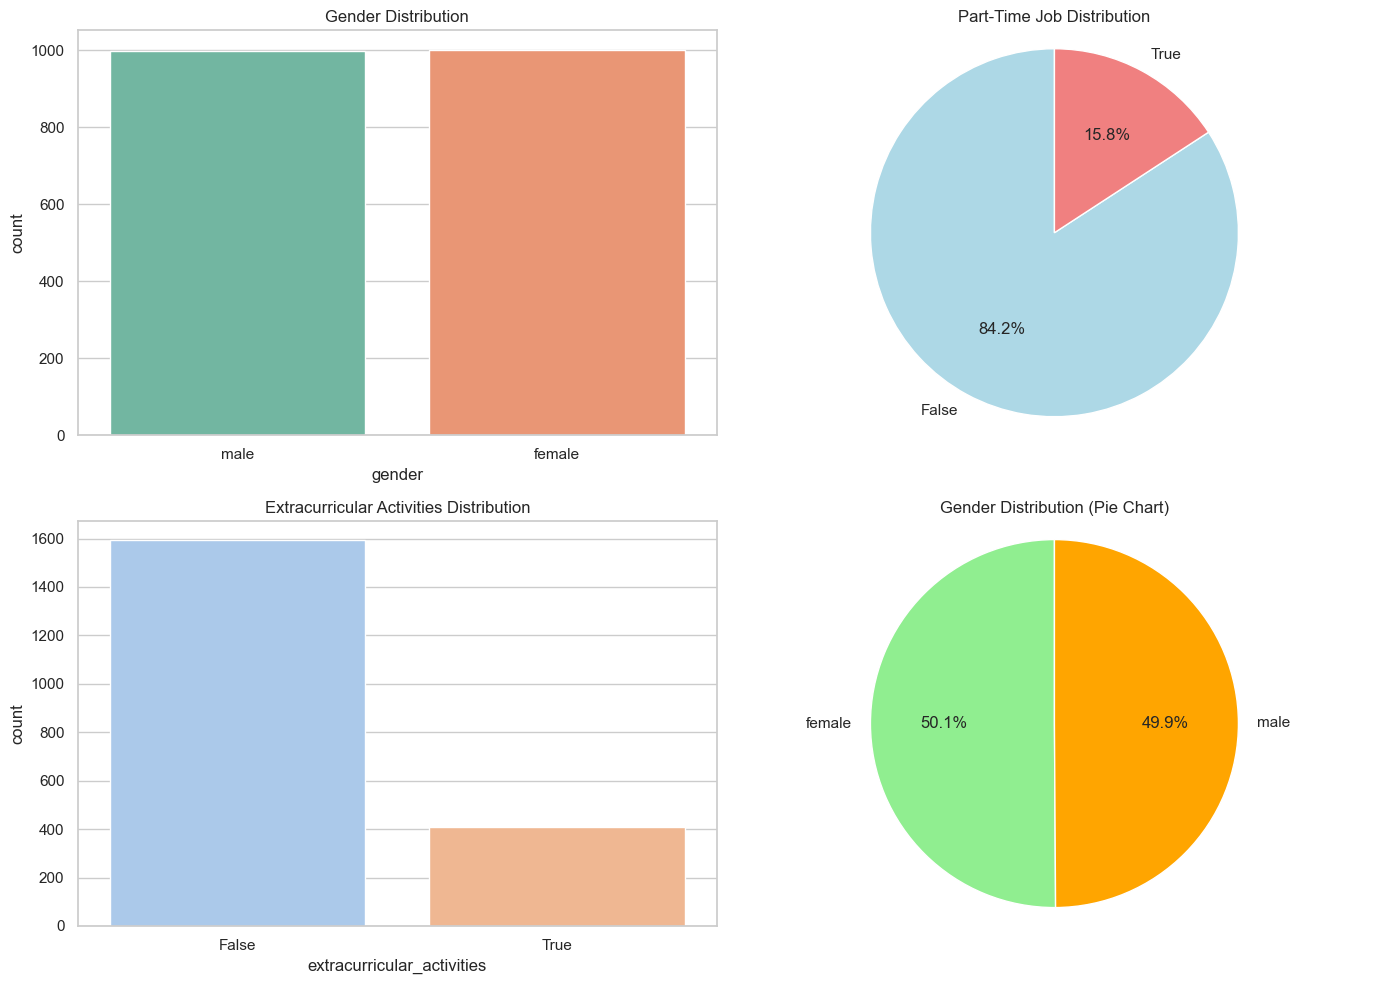

In [7]:
# Create a 2x2 grid for plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Bar Chart for Gender distribution
sns.countplot(data=data, x='gender', palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

# Pie Chart for Part-time Job distribution
part_time_job_counts = data['part_time_job'].value_counts()
axes[0, 1].pie(part_time_job_counts, labels=part_time_job_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axes[0, 1].axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
axes[0, 1].set_title('Part-Time Job Distribution')

# Bar Chart for Extracurricular Activities distribution
sns.countplot(data=data, x='extracurricular_activities', palette='pastel', ax=axes[1, 0])
axes[1, 0].set_title('Extracurricular Activities Distribution')

# Pie Chart for Gender distribution (for comparison)
gender_counts = data['gender'].value_counts()
axes[1, 1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'orange'])
axes[1, 1].axis('equal')
axes[1, 1].set_title('Gender Distribution (Pie Chart)')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [8]:
from scipy.stats import ttest_ind

# Separate data for Male and Female students
male_scores = data[data['gender'] == 'Male']['math_score']
female_scores = data[data['gender'] == 'Female']['math_score']

# Perform the independent t-test
t_stat, p_value = ttest_ind(male_scores, female_scores)

# Print the result
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Significance Level
alpha = 0.05  # Typically 0.05 for a 95% confidence level

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Math scores between Male and Female students.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Math scores between Male and Female students.")


T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: There is no significant difference in Math scores between Male and Female students.


In [9]:
from scipy.stats import ttest_ind

# Separate data for Male and Female students
male_scores = data[data['gender'] == 'Male']['math_score']
female_scores = data[data['gender'] == 'Female']['math_score']

# Perform the independent t-test
t_stat, p_value = ttest_ind(male_scores, female_scores)

# Print the result
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Significance Level
alpha = 0.05  # Typically 0.05 for a 95% confidence level

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Math scores between Male and Female students.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Math scores between Male and Female students.")


T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: There is no significant difference in Math scores between Male and Female students.


Regression Analysis for math_score
Mean Squared Error: 138.93
R-squared: 0.16



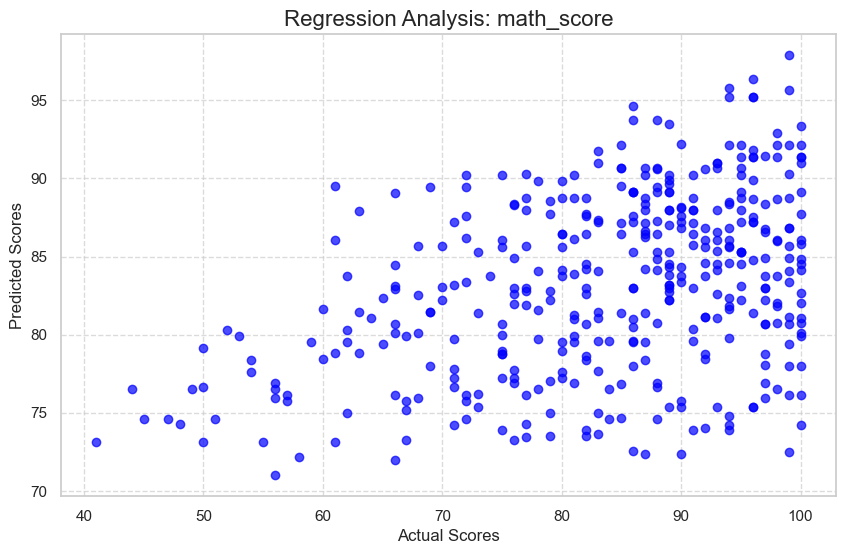

Regression Analysis for english_score
Mean Squared Error: 141.96
R-squared: 0.06



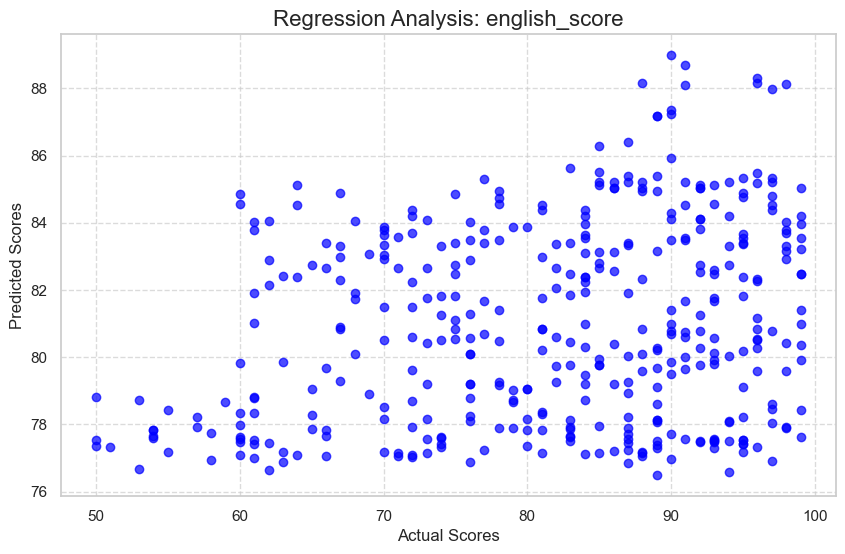

Regression Analysis for physics_score
Mean Squared Error: 157.43
R-squared: 0.03



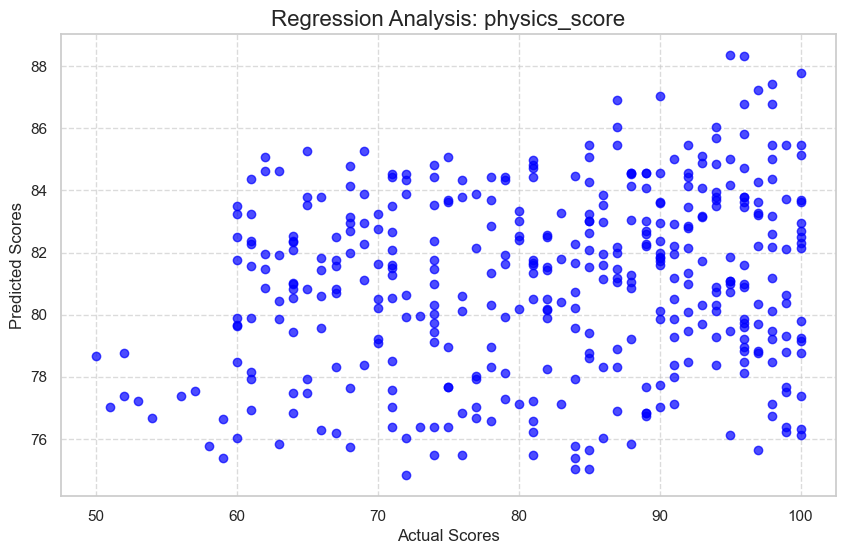

Regression Analysis for chemistry_score
Mean Squared Error: 160.27
R-squared: 0.04



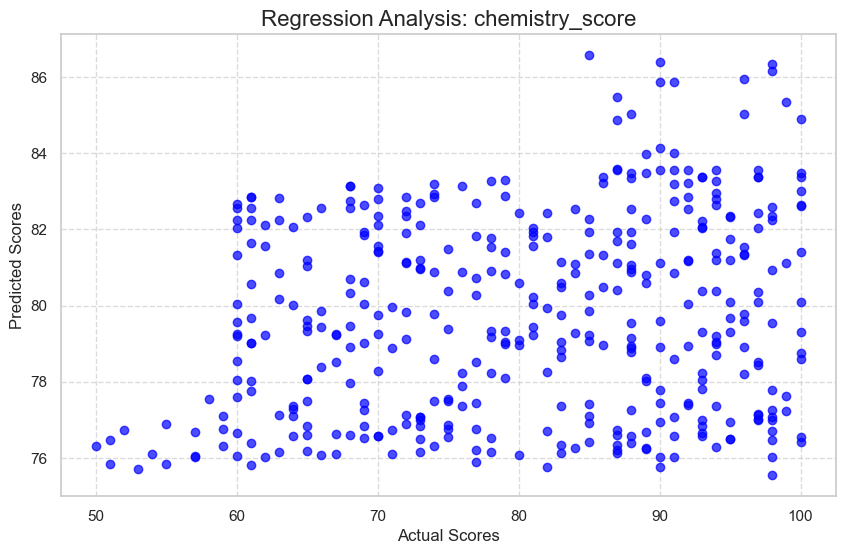

In [19]:
# Function to perform regression analysis for a specific subject
def regression_analysis(data, subject, predictors, title="Regression Analysis"):
    # Prepare data
    X = data[predictors]
    y = data[subject]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Regression Analysis for {subject}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}\n")

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
    plt.title(f"{title}: {subject}", fontsize=16)
    plt.xlabel('Actual Scores', fontsize=12)
    plt.ylabel('Predicted Scores', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Specify subjects and predictors
selected_subjects = ['math_score', 'english_score', 'physics_score', 'chemistry_score']
predictors = ['absence_days', 'extracurricular_activities', 'weekly_self_study_hours']

# Call the function for each subject
for subject in selected_subjects:
    regression_analysis(data, subject, predictors)


In [ ]:
#Exploratary data analysis task
fig1 = px.scatter(
    data,
    x="weekly_self_study_hours",
    y="math_score",
    color="part_time_job",
    title="Weekly Self-Study Hours vs Math Score",
    labels={"weekly_self_study_hours": "Weekly Self-Study Hours", "math_score": "Math Score"},
    hover_data=["first_name", "last_name"]
)
fig1.show()

# 2. Bar Chart: Average Scores by Extracurricular Activities Participation
average_scores = data.groupby("extracurricular_activities").mean(numeric_only=True).reset_index()
fig2 = px.bar(
    average_scores,
    x="extracurricular_activities",
    y=["math_score", "english_score", "history_score"],
    barmode="group",
    title="Average Scores by Extracurricular Activities Participation",
    labels={"value": "Average Score", "variable": "Subjects"},
)
fig2.show()

# 3. Line Chart: Absence Days vs Average Math Score
absences_avg_scores = data.groupby("absence_days")["math_score"].mean().reset_index()
fig3 = px.line(
    absences_avg_scores,
    x="absence_days",
    y="math_score",
    title="Absence Days vs Average Math Score",
    labels={"absence_days": "Number of Absence Days", "math_score": "Average Math Score"},
)
fig3.show()

# 4. Box Plot: Distribution of Chemistry Scores by Gender
fig4 = px.box(
    data,
    x="gender",
    y="chemistry_score",
    title="Distribution of Chemistry Scores by Gender",
    labels={"gender": "Gender", "chemistry_score": "Chemistry Score"},
    color="gender",
)
fig4.show()

In [11]:
data['average_score'] = data[
    ['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 
     'english_score', 'geography_score']
].mean(axis=1)

# 2. Create a new feature: Total Score Across All Subjects
data['total_score'] = data[
    ['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 
     'english_score', 'geography_score']
].sum(axis=1)

# 3. Create a feature: Engagement Level Based on Activities and Absences
def calculate_engagement(row):
    if row['extracurricular_activities'] == 'Yes' and row['absence_days'] <= 5:
        return 'Highly Engaged'
    elif row['extracurricular_activities'] == 'No' and row['absence_days'] > 10:
        return 'Low Engagement'
    else:
        return 'Moderate Engagement'

data['engagement_level'] = data.apply(calculate_engagement, axis=1)

# 4. Create a feature: Science Score Average
data['science_average'] = data[['physics_score', 'chemistry_score', 'biology_score']].mean(axis=1)

# Display the newly engineered features
print(data[['average_score', 'total_score', 'engagement_level', 'science_average']].head())

# Save the modified dataset for further use
data.to_csv('student_scores_with_features.csv', index=False)

print("Feature engineering complete! New features added to the dataset.")

   average_score  total_score     engagement_level  science_average
0      82.000000          574  Moderate Engagement        84.333333
1      91.428571          640  Moderate Engagement        95.333333
2      86.428571          605  Moderate Engagement        85.333333
3      78.714286          551  Moderate Engagement        85.666667
4      74.428571          521  Moderate Engagement        70.000000
Feature engineering complete! New features added to the dataset.


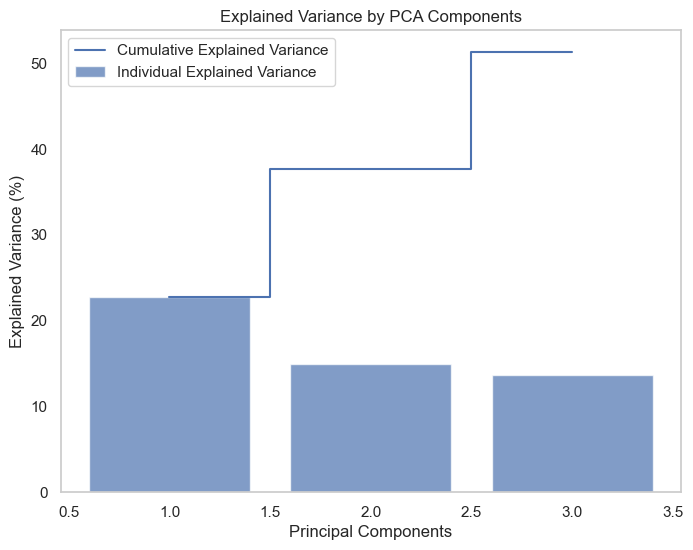

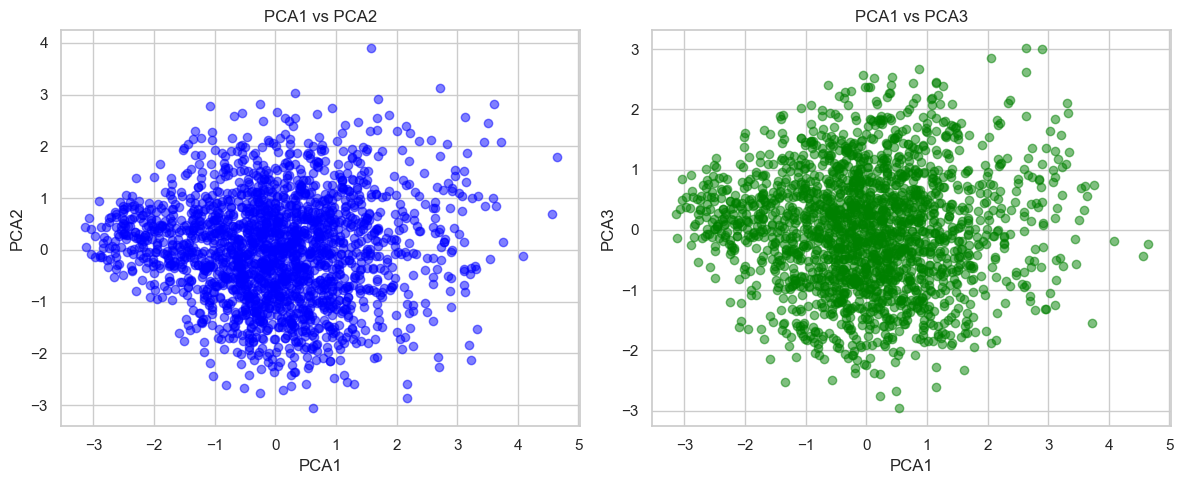

       PCA1      PCA2      PCA3
0 -0.231763  0.572375 -0.379083
1 -2.177615  0.669388 -0.335840
2 -1.159658  0.292991 -0.119946
3  0.546810  1.861464 -0.149017
4  1.377260 -0.483420  0.323167
Dimensionality reduction with PCA complete!


In [12]:
numerical_features = [
    'math_score', 'history_score', 'physics_score', 'chemistry_score', 
    'biology_score', 'english_score', 'geography_score'
]
data_for_pca = data[numerical_features]

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

# Step 3: Apply PCA
pca = PCA(n_components=3)  # Reduce to 3 components
pca_data = pca.fit_transform(scaled_data)

# Step 4: Add PCA results to the original DataFrame
data['PCA1'] = pca_data[:, 0]
data['PCA2'] = pca_data[:, 1]
data['PCA3'] = pca_data[:, 2]

# Step 5: Visualize the explained variance
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(
    range(1, 4), explained_variance * 100, alpha=0.7, align='center', 
    label='Individual Explained Variance'
)
plt.step(
    range(1, 4), np.cumsum(explained_variance) * 100, where='mid', 
    label='Cumulative Explained Variance'
)
plt.ylabel('Explained Variance (%)')
plt.xlabel('Principal Components')
plt.title('Explained Variance by PCA Components')
plt.legend(loc='best')
plt.grid()
plt.show()

# Step 6: Scatter plots for PCA Components
plt.figure(figsize=(12, 5))

# Scatter plot PCA1 vs PCA2
plt.subplot(1, 2, 1)
plt.scatter(data['PCA1'], data['PCA2'], c='blue', alpha=0.5)
plt.title('PCA1 vs PCA2')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Scatter plot PCA1 vs PCA3
plt.subplot(1, 2, 2)
plt.scatter(data['PCA1'], data['PCA3'], c='green', alpha=0.5)
plt.title('PCA1 vs PCA3')
plt.xlabel('PCA1')
plt.ylabel('PCA3')

plt.tight_layout()
plt.show()

# Display a few rows of the updated DataFrame
print(data[['PCA1', 'PCA2', 'PCA3']].head())

# Save the PCA-transformed dataset
data.to_csv('student_scores_with_pca.csv', index=False)

print("Dimensionality reduction with PCA complete!")

Accuracy: 89.83%
Classification Report:
               precision    recall  f1-score   support

        High       0.89      0.95      0.92       352
         Low       0.00      0.00      0.00         1
      Medium       0.91      0.83      0.87       247

    accuracy                           0.90       600
   macro avg       0.60      0.59      0.60       600
weighted avg       0.90      0.90      0.90       600



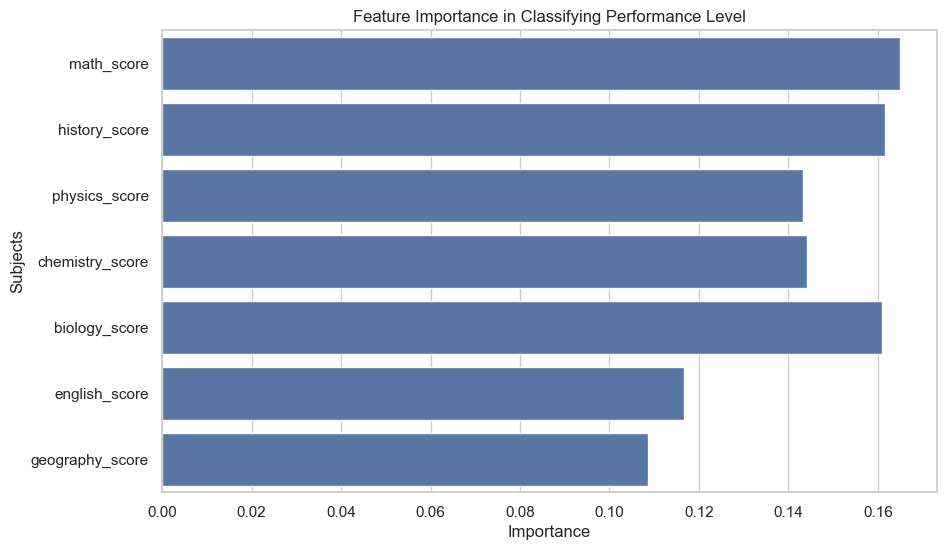

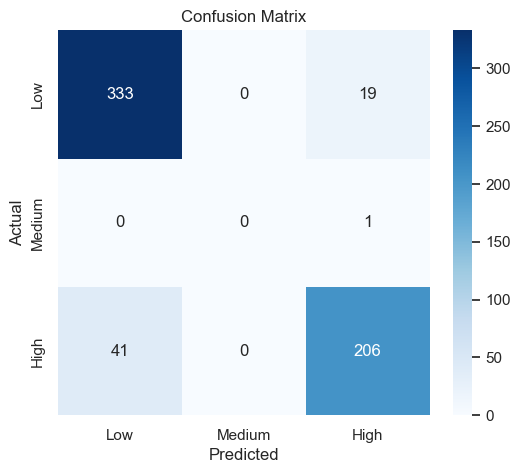

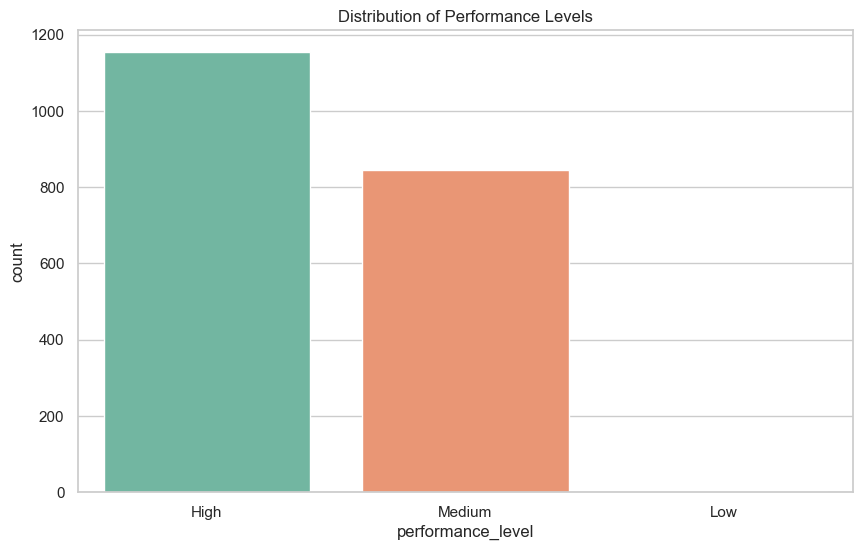

In [13]:
score_columns = [
    'math_score', 'history_score', 'physics_score', 'chemistry_score',
    'biology_score', 'english_score', 'geography_score'
]
data['average_score'] = data[score_columns].mean(axis=1)

# Step 2: Classify performance levels based on average score
def categorize_performance(score):
    if score >= 80:
        return 'High'
    elif score >= 60:
        return 'Medium'
    else:
        return 'Low'

data['performance_level'] = data['average_score'].apply(categorize_performance)

# Step 3: Split the data into features and target
X = data[score_columns]  # Features (subjects scores)
y = data['performance_level']  # Target variable (performance level)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = clf.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 8: Visualize the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=clf.feature_importances_, y=score_columns)
plt.title('Feature Importance in Classifying Performance Level')
plt.xlabel('Importance')
plt.ylabel('Subjects')
plt.show()

# Step 9: Confusion Matrix (Optional but helpful)
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 10: Visualize model performance by plotting predicted vs actual performance levels
plt.figure(figsize=(10, 6))
sns.countplot(x='performance_level', data=data, hue='performance_level', palette="Set2")
plt.title('Distribution of Performance Levels')
plt.show()

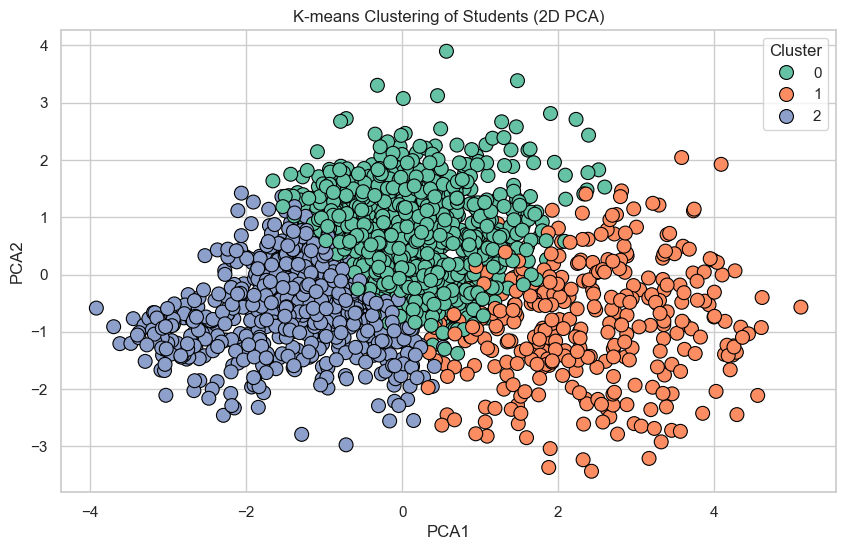

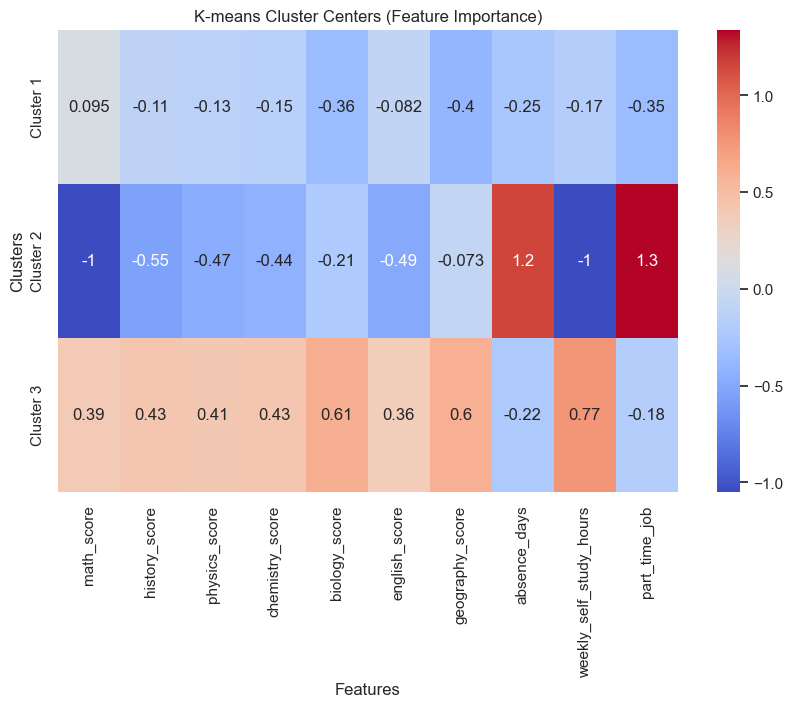

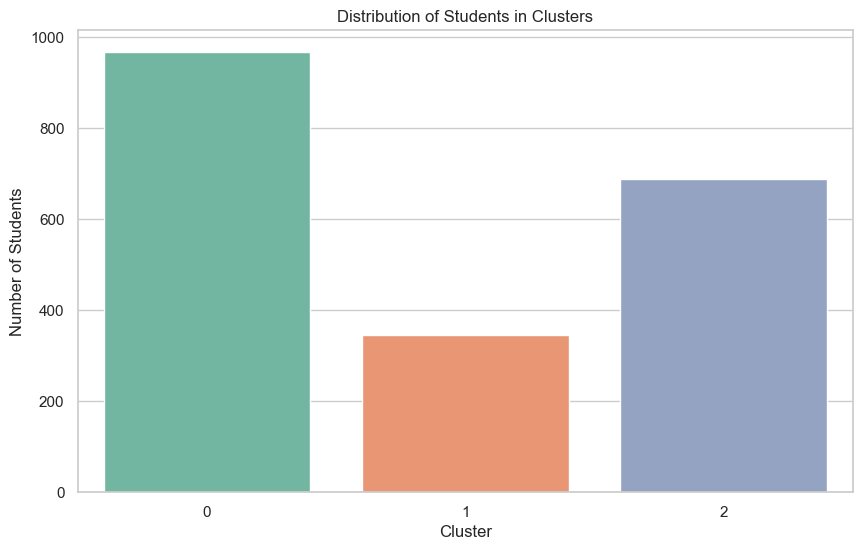

In [14]:
# Step 1: Select relevant features for clustering (scores and characteristics)
features = [
    'math_score', 'history_score', 'physics_score', 'chemistry_score',
    'biology_score', 'english_score', 'geography_score',
    'absence_days', 'weekly_self_study_hours', 'part_time_job'
]

# Step 2: Preprocess the data
# Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])

# Step 3: Apply K-means clustering
# Let's try with 3 clusters for this example, you can adjust the number based on analysis
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Visualize the clusters (using two principal components for 2D visualization)
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for easier plotting
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = data['cluster']

# Step 5: Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set2', s=100, edgecolor='black')
plt.title('K-means Clustering of Students (2D PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

# Step 6: Visualize cluster centers in original feature space (using feature importance)
centers = kmeans.cluster_centers_

# Step 7: Plot the cluster centers
plt.figure(figsize=(10, 6))
sns.heatmap(centers, annot=True, cmap='coolwarm', xticklabels=features, yticklabels=[f'Cluster {i+1}' for i in range(3)])
plt.title('K-means Cluster Centers (Feature Importance)')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.show()

# Step 8: Visualize the distribution of students across clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=data, palette="Set2")
plt.title('Distribution of Students in Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Students')
plt.show()

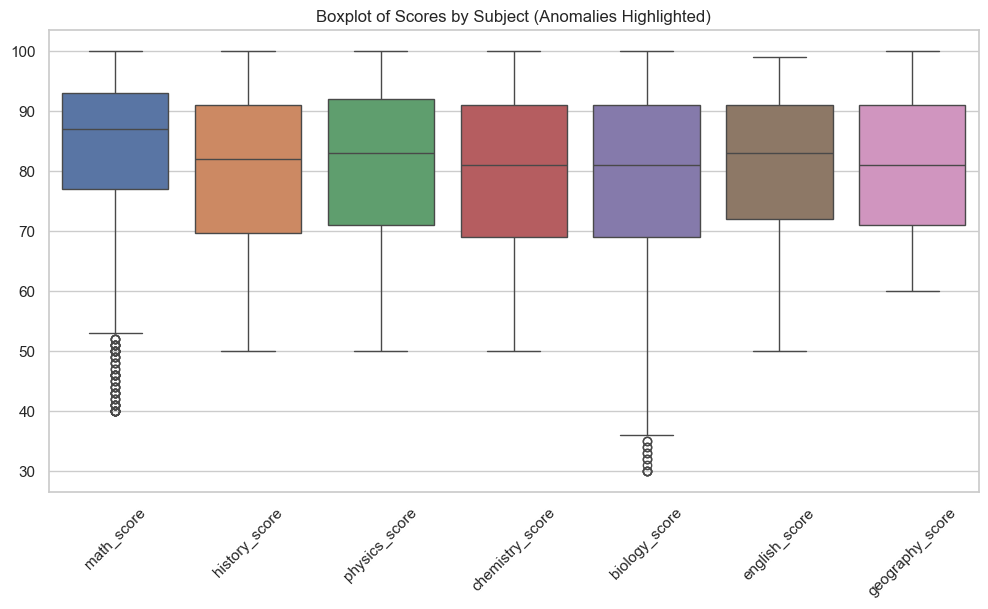

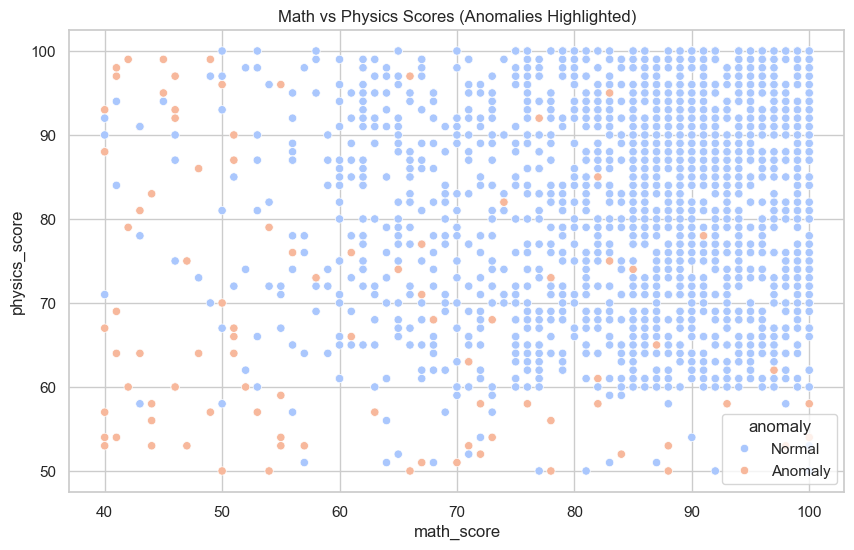

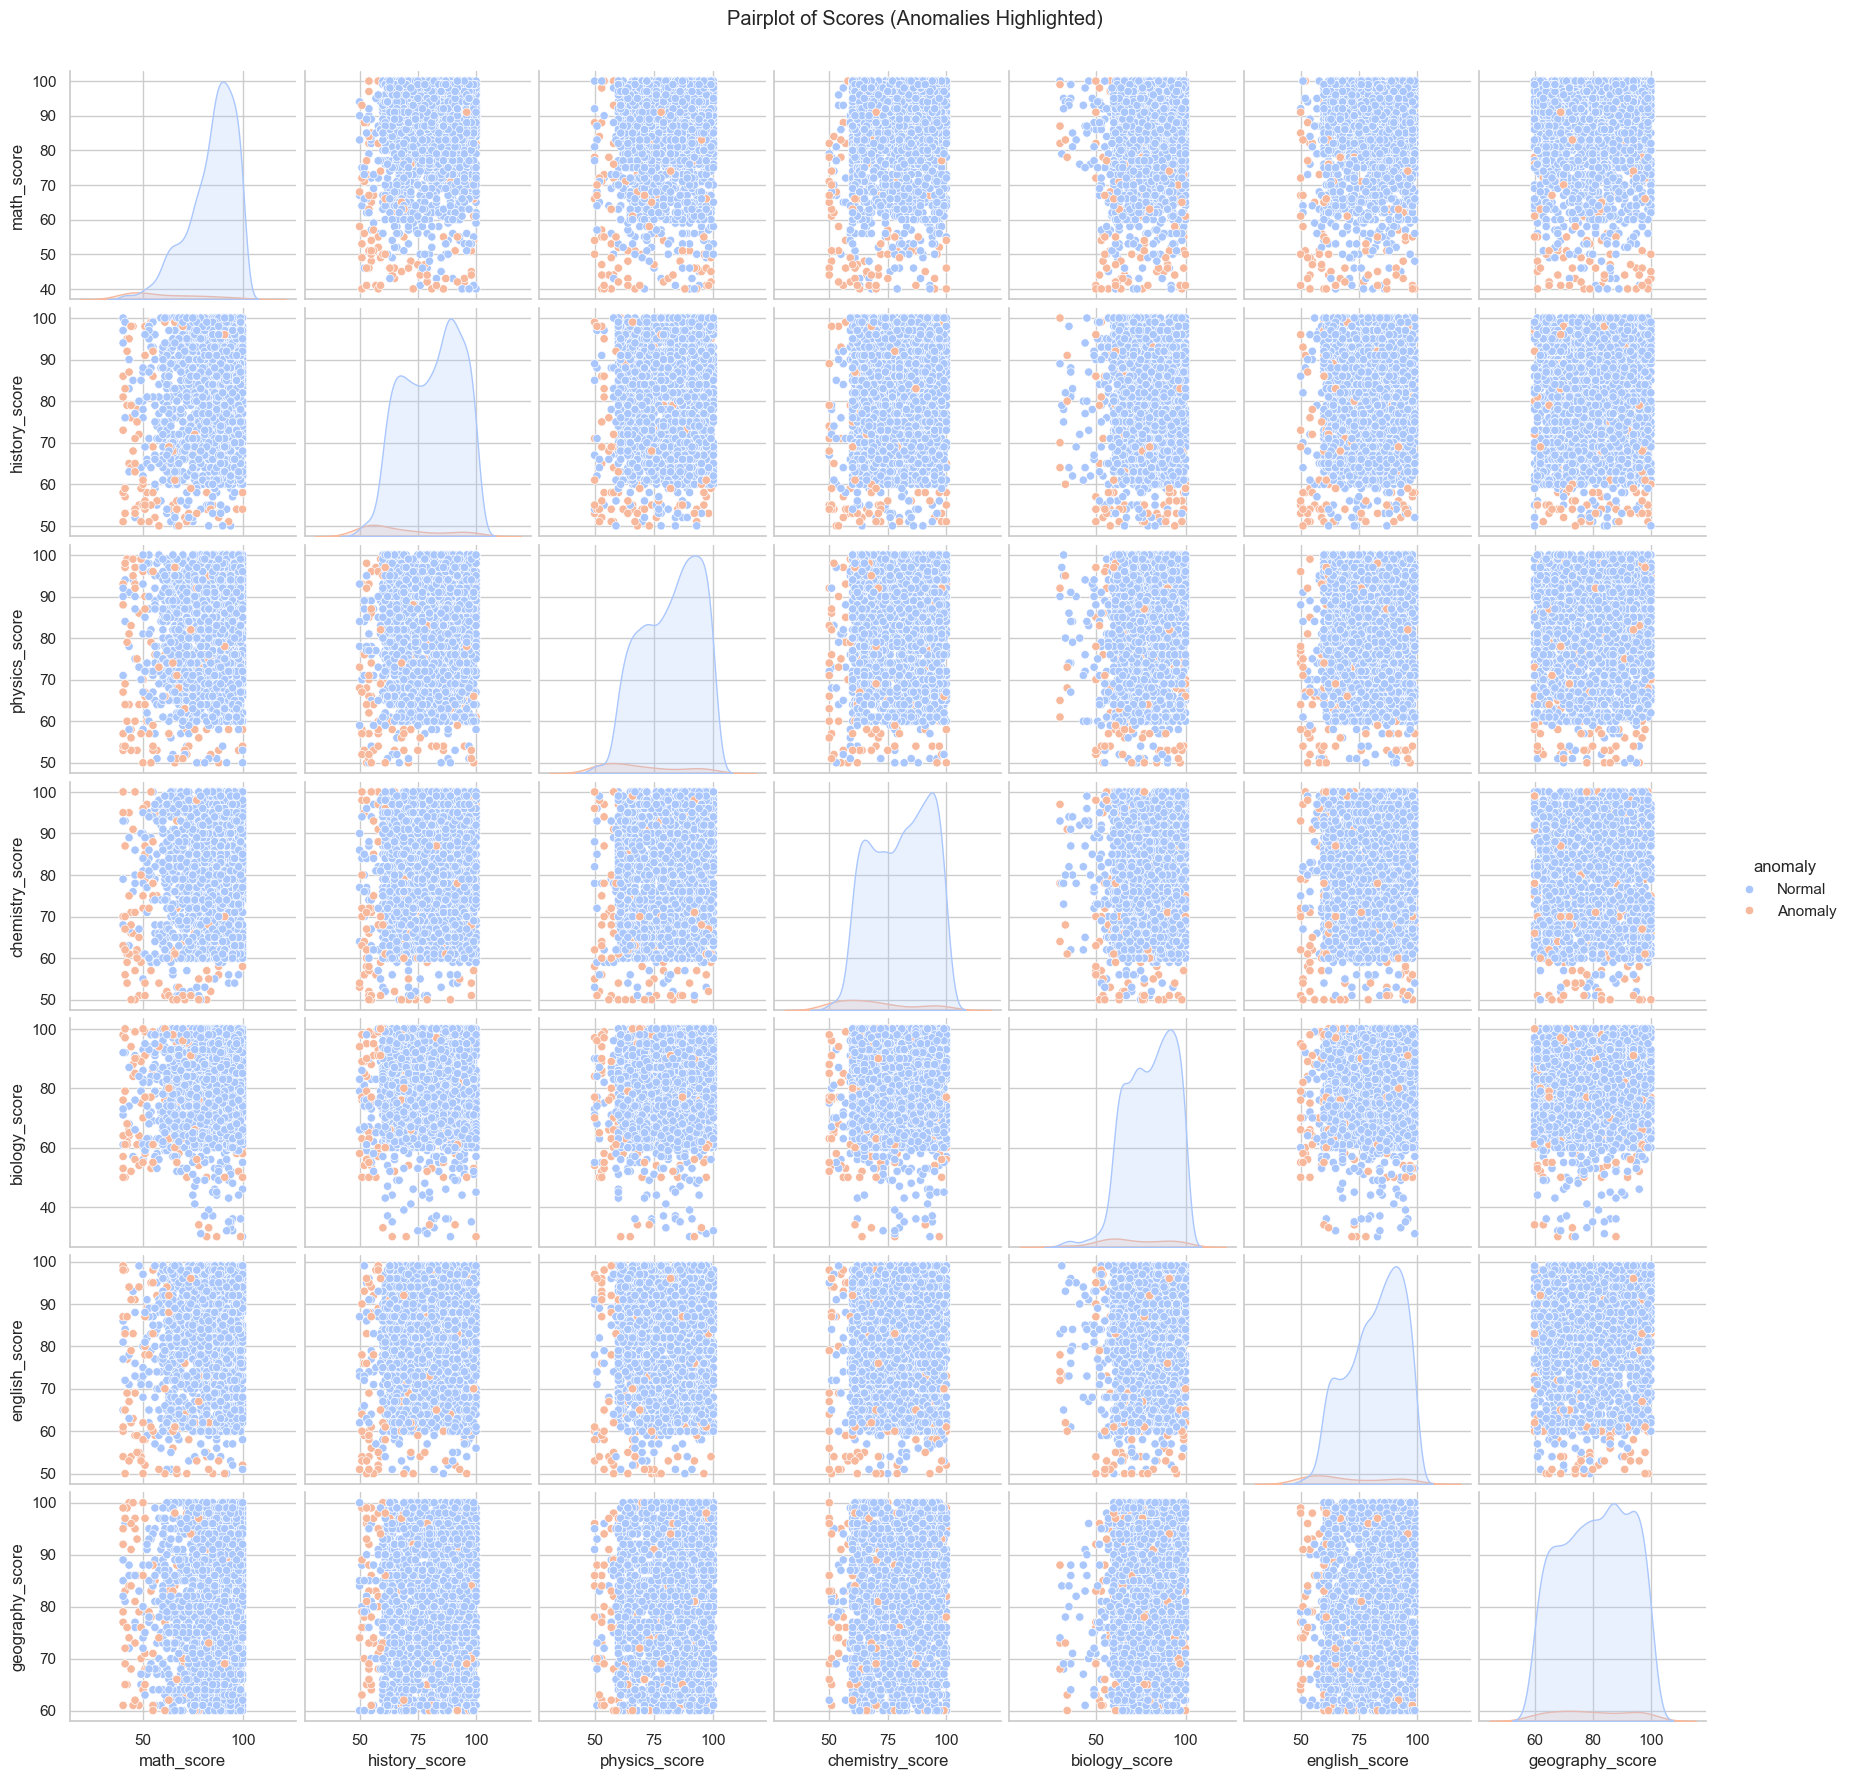

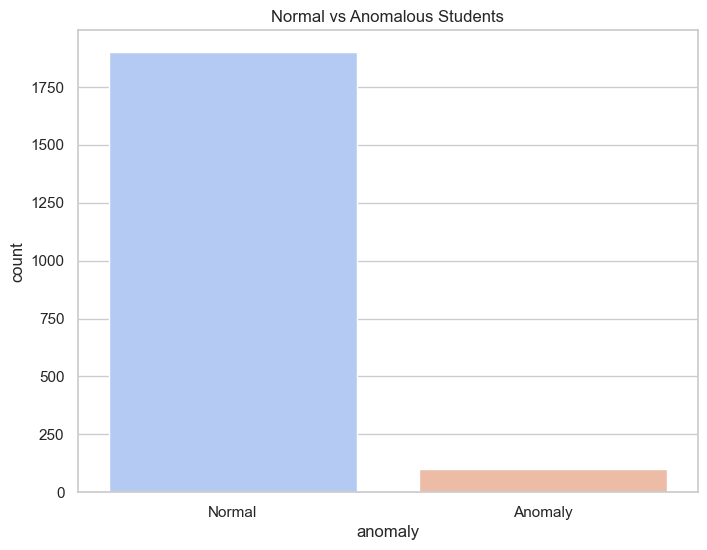

In [15]:
numerical_columns = [
    'math_score', 'history_score', 'physics_score', 'chemistry_score', 
    'biology_score', 'english_score', 'geography_score'
]

# Extract the numerical columns from the dataset
X = data[numerical_columns]

# Standardize the data (important for anomaly detection models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Isolation Forest for anomaly detection
model = IsolationForest(contamination=0.05, random_state=42)  # Assume 5% anomalies in the dataset
data['anomaly'] = model.fit_predict(X_scaled)

# The model outputs 1 for normal and -1 for anomaly. We can map these to "Normal" and "Anomaly"
data['anomaly'] = data['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# Visualization 1: Distribution of scores for different subjects with anomalies highlighted
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_columns])
plt.title("Boxplot of Scores by Subject (Anomalies Highlighted)")
plt.xticks(rotation=45)
plt.show()

# Visualization 2: Scatter plot of Math vs Physics scores, highlighting anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='math_score', y='physics_score', hue='anomaly', palette='coolwarm')
plt.title("Math vs Physics Scores (Anomalies Highlighted)")
plt.show()

# Visualization 3: Pair plot to visualize the relationship between all numerical columns
sns.pairplot(data, hue='anomaly', vars=numerical_columns, palette='coolwarm')
plt.suptitle("Pairplot of Scores (Anomalies Highlighted)", y=1.02)
plt.show()

# Visualization 4: Histogram of the number of normal vs anomalous students
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='anomaly', palette='coolwarm')
plt.title("Normal vs Anomalous Students")
plt.show()

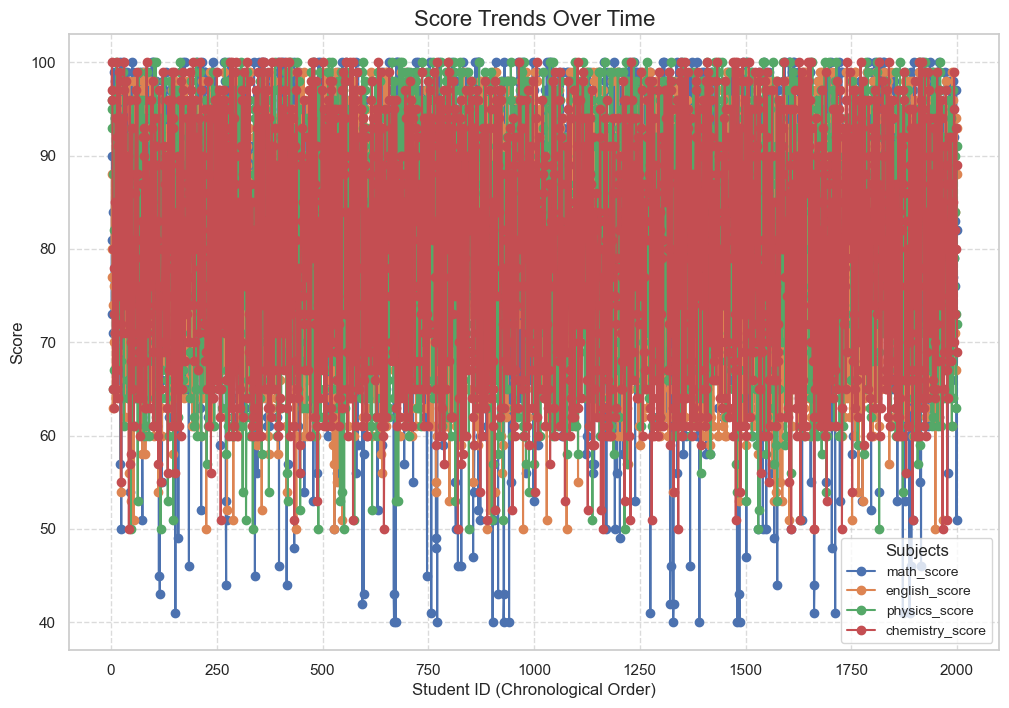

In [16]:
def plot_score_trends(data, subjects, title="Score Trends Over Time"):
    plt.figure(figsize=(12, 8))

    for subject in subjects:
        plt.plot(data['id'], data[subject], label=subject, marker='o')

    plt.title(title, fontsize=16)
    plt.xlabel('Student ID (Chronological Order)', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.legend(title="Subjects", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Specify subjects to analyze
selected_subjects = ['math_score', 'english_score', 'physics_score', 'chemistry_score']

# Call the function
plot_score_trends(data, selected_subjects)


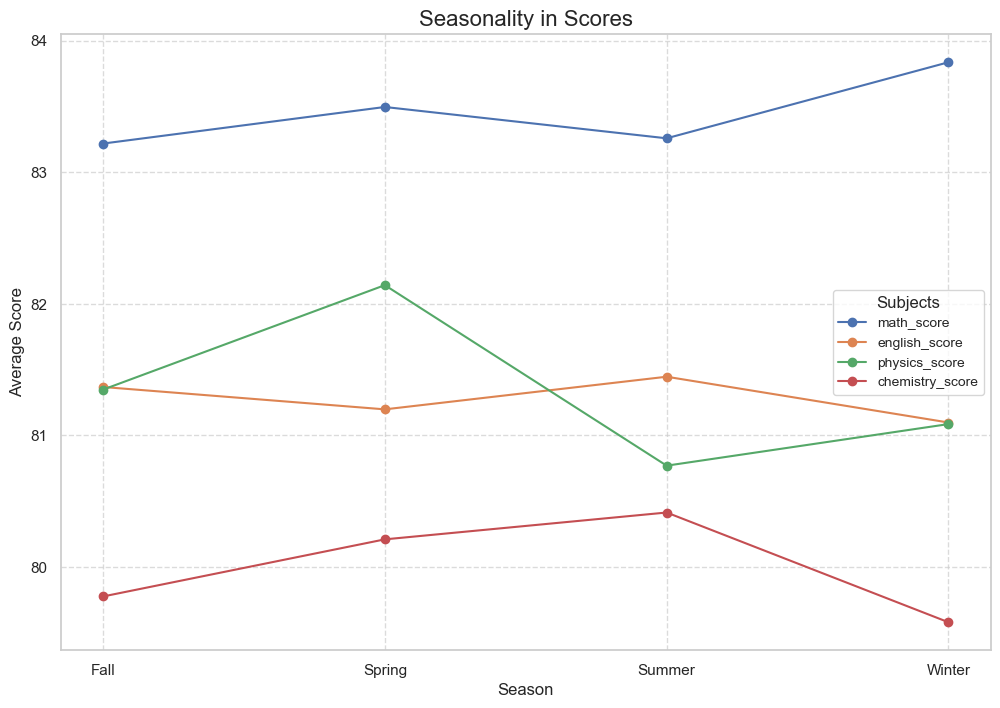

In [17]:
# Assuming 'data' is already loaded as a DataFrame

# Generate a synthetic 'season' column (if no explicit time data exists)
# Here, we divide IDs into 4 arbitrary seasons (e.g., Spring, Summer, Fall, Winter)
data['season'] = np.where(data['id'] % 4 == 1, 'Spring',
                  np.where(data['id'] % 4 == 2, 'Summer',
                  np.where(data['id'] % 4 == 3, 'Fall', 'Winter')))

# Function to plot seasonal patterns
def plot_seasonality(data, subjects, title="Seasonality in Scores"):
    plt.figure(figsize=(12, 8))

    for subject in subjects:
        seasonal_avg = data.groupby('season')[subject].mean()
        plt.plot(seasonal_avg.index, seasonal_avg.values, label=subject, marker='o')

    plt.title(title, fontsize=16)
    plt.xlabel('Season', fontsize=12)
    plt.ylabel('Average Score', fontsize=12)
    plt.legend(title="Subjects", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Specify subjects to analyze
selected_subjects = ['math_score', 'english_score', 'physics_score', 'chemistry_score']

# Call the function
plot_seasonality(data, selected_subjects)


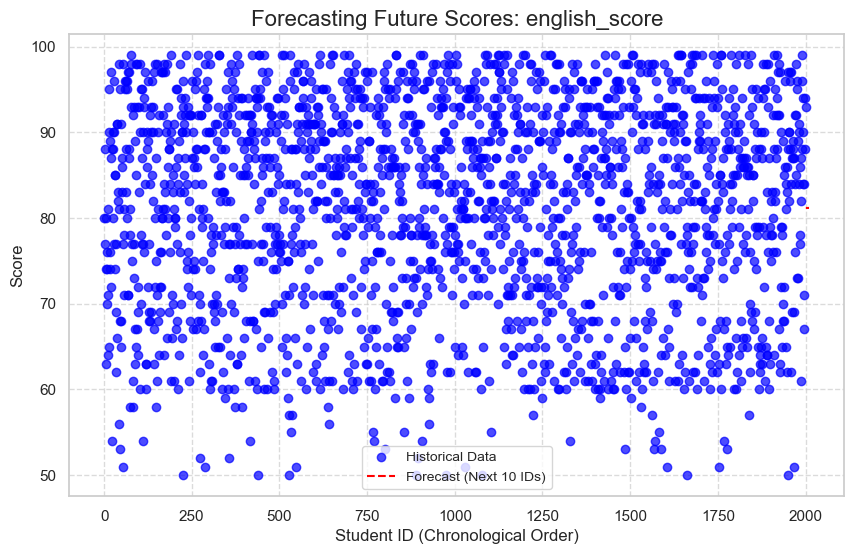

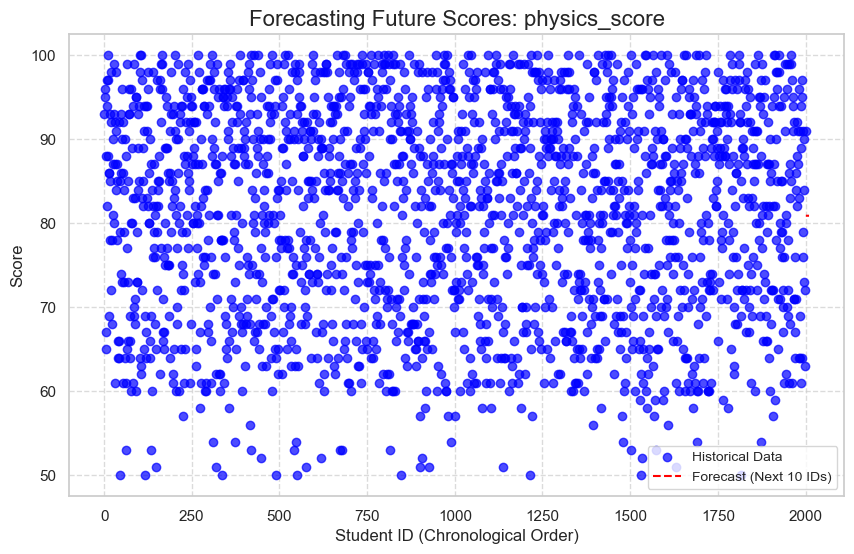

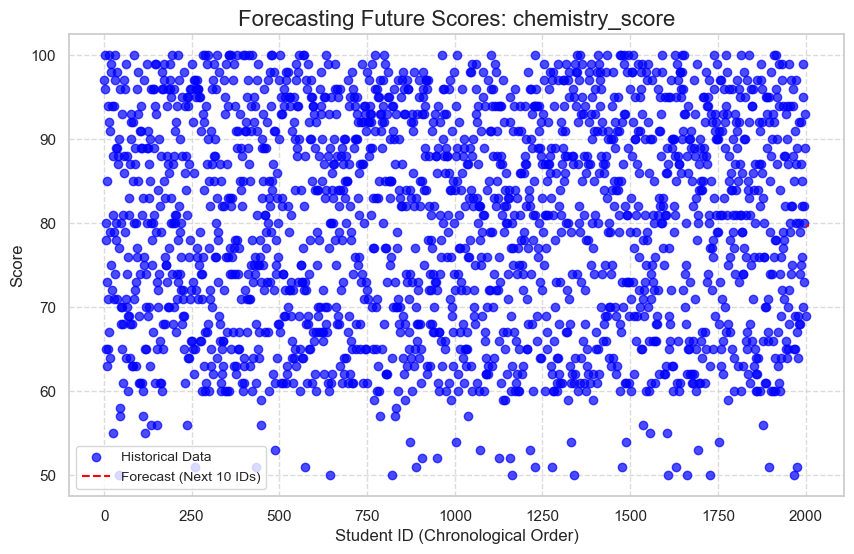

In [18]:
def forecast_scores(data, subject, title="Forecasting Future Scores"):
    # Prepare data for regression
    X = data['id'].values.reshape(-1, 1)  # Use 'id' as the time variable
    y = data[subject].values

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    future_ids = np.arange(data['id'].max() + 1, data['id'].max() + 11).reshape(-1, 1)  # Predict next 10 IDs
    y_pred_future = model.predict(future_ids)

    # Plot historical data and forecast
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Historical Data', alpha=0.7)
    plt.plot(future_ids, y_pred_future, color='red', label='Forecast (Next 10 IDs)', linestyle='--')
    plt.title(f"{title}: {subject}", fontsize=16)
    plt.xlabel('Student ID (Chronological Order)', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Specify subjects to forecast
selected_subjects = ['math_score', 'english_score', 'physics_score', 'chemistry_score']

# Call the function for each subject
for subject in selected_subjects:
    forecast_scores(data, subject)
